In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
train_path = "../dataset/preprocessed/netflix_train.csv"
val_path = "../dataset/preprocessed/netflix_val.csv"
test_path = "../dataset/preprocessed/netflix_test.csv"

train_data = pd.read_csv(train_path)
val_data = pd.read_csv(val_path)
test_data = pd.read_csv(test_path)

train_val_data = pd.concat([train_data, val_data])

In [3]:
vectorizer = CountVectorizer()
X_train_val = vectorizer.fit_transform(train_val_data['title'] + ' ' + train_val_data['description'])
X_test = vectorizer.transform(test_data['title'] + ' ' + test_data['description'])

y_train_val = train_val_data['target_ages']
y_test = test_data['target_ages']

In [4]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_val, y_train_val)

MultinomialNB()

In [5]:
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.571969696969697
Classification Report:
               precision    recall  f1-score   support

      Adults       0.61      0.81      0.69       614
        Kids       0.74      0.26      0.38        66
  Older Kids       0.57      0.35      0.43       242
       Teens       0.47      0.40      0.43       398

    accuracy                           0.57      1320
   macro avg       0.60      0.45      0.48      1320
weighted avg       0.57      0.57      0.55      1320



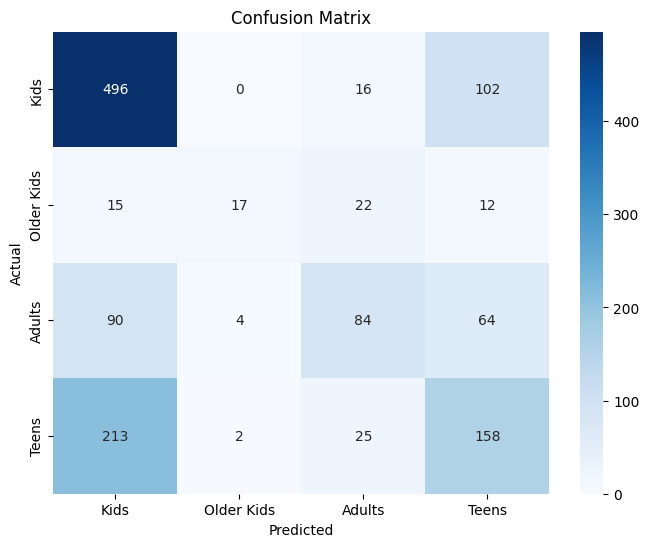

In [6]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_val_data['target_ages'].unique(), yticklabels=train_val_data['target_ages'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()